# Notebook for initial analysis of the Tidal Data

## From this code we can start generating useful functions

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import tide_utils as tide

In [3]:
NeahBay = tide.load_Neah_Bay('../Data/')
PortAngeles = tide.load_Port_Angeles('../Data/')
PortTownsend = tide.load_Port_Townsend('../Data/')

In [4]:
Tides = tide.create_tide_dataset(NeahBay,PortAngeles,PortTownsend)

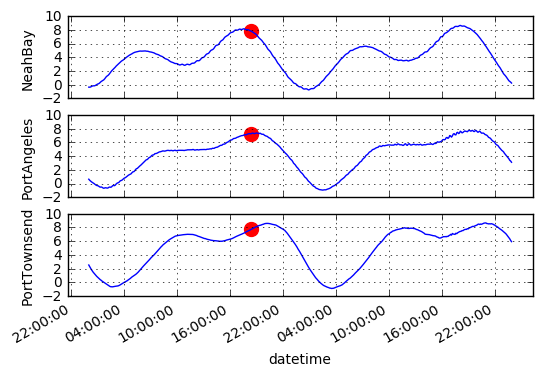

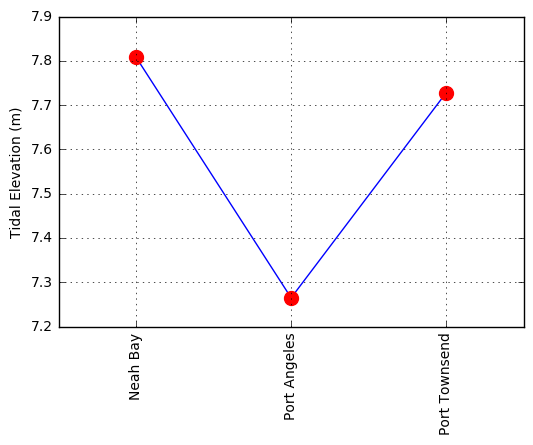

In [5]:
%matplotlib inline
tide.plot_tide_data(Tides,'2015-01-01','2015-01-02')

## Load the tidal csv data and put into a single dataframe and create a useful datetime index

In [ ]:
def load_Neah_Bay(datadir):
    """
    Function to load the Neah Bay tidal station data from 2015 - 2016 
    and returns a dataframe and a Datetime Index object
    Datadir is the directory path to where the data is located
    """
    if not glob.glob(os.path.join(datadir, '*NeahBay.csv')):
        return None
    else:
        NeahBay_2014 = pd.read_csv(datadir + "2014_NeahBay.csv",parse_dates=['Date Time'])
        NeahBay_2015 = pd.read_csv(datadir + "2015_NeahBay.csv",parse_dates=['Date Time'])
        NeahBay_2016 = pd.read_csv(datadir + "2016_NeahBay.csv",parse_dates=['Date Time'])
        NeahBay = NeahBay_2014.append(NeahBay_2015)
        NeahBay = NeahBay.append(NeahBay_2016)
        NeahBay.rename(columns={'Date Time':'datetime'}, inplace=True)
        return NeahBay

In [ ]:
def load_Port_Angeles(datadir):
    """
    Function to load the Port Angeles tidal station data from 2015 & 2016 
    Supply the directory to where the csv files with the data are saved
    Returns None if files are not located in specified directory
    """
    if not glob.glob(os.path.join(datadir, '*PortAngeles.csv')):
        return None
    else:
        # Load the Port Angeles tidal data and put into one dataframe
        PortAngeles_2014 = pd.read_csv(datadir + '/2014_PortAngeles.csv',parse_dates=['Date Time'])
        PortAngeles_2015 = pd.read_csv(datadir + '/2015_PortAngeles.csv',parse_dates=['Date Time'])
        PortAngeles_2016 = pd.read_csv(datadir + '/2016_PortAngeles.csv',parse_dates=['Date Time'])
        PortAngeles = PortAngeles_2014.append(PortAngeles_2015)
        PortAngeles = PortAngeles.append(PortAngeles_2016)
        PortAngeles.rename(columns={'Date Time':'datetime'}, inplace=True)
        return PortAngeles

In [ ]:
def load_Port_Townsend(datadir):
    """
    Function to load the Port Townsend tidal station data from 2015 & 2016 
    Supply the directory to where the csv files with the data are saved
    Returns None if files are not located in specified directory
    """
    if not glob.glob(os.path.join(datadir, '*PortTownsend.csv')):
        return None
    else:
        PortTownsend_2014 = pd.read_csv(datadir + '/2014_PortTownsend.csv',parse_dates=['Date Time'])
        PortTownsend_2015 = pd.read_csv(datadir + '/2015_PortTownsend.csv',parse_dates=['Date Time'])
        PortTownsend_2016 = pd.read_csv(datadir + '/2016_PortTownsend.csv',parse_dates=['Date Time'])
        PortTownsend = PortTownsend_2014.append(PortTownsend_2015)
        PortTownsend = PortTownsend.append(PortTownsend_2016)
        PortTownsend.rename(columns={'Date Time':'datetime'}, inplace=True)
        return PortTownsend

In [ ]:
def load_tide_data(datadir):
    """
    Upper level load function for the Tide Data.
    Datadir is the directory where the data .csv files are saved
    """
    NeahBay = load_Neah_Bay(datadir)
    PortAngeles = load_Port_Angeles(datadir)
    PortTownsend = load_Port_Townsend(datadir)
    return NeahBay, PortAngeles, PortTownsend
    

In [ ]:
import fnmatch
import os

def find_files(base, pattern):
    '''Return list of files matching pattern in base folder.'''
    return [n for n in fnmatch.filter(os.listdir(base), pattern) if
        os.path.isfile(os.path.join(base, n))]



In [ ]:
print(PortTownsend)

In [ ]:
def create_tide_dataset(NeahBay,PortAngeles,PortTownsend):
    """
    Function takes in the tidal station dataframes and returns
    an Xarray Dataset with the tidal station data
    """
    NB = xr.DataArray(NeahBay['Water Level'],dims='datetime')
    PA = xr.DataArray(PortAngeles['Water Level'],dims='datetime')
    PT = xr.DataArray(PortTownsend['Water Level'],dims='datetime')
    Tides = xr.Dataset({'NeahBay':NB, 'PortAngeles':PA, 'PortTownsend':PT})
    return Tides

In [ ]:
Tides

In [ ]:
# Take a slice
NB = Tides.NeahBay.sel(datetime=slice('2015-01-01','2015-01-02'))
PA = Tides.PortAngeles.sel(datetime=slice('2015-01-01','2015-01-02'))
PT = Tides.PortTownsend.sel(datetime=slice('2015-01-01','2015-01-02'))

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

In [ ]:
def plot_tide_time_series(NB,PA,PT,dt):
    """
    This function plots the three tidal stations for the given
    time period along with a marker showing the time and elevation
    selected using the widget slider
    Input:
        NB - Neah Bay tide DataArray
        PA - Port Angeles tide DataArray
        PT - Port Townsend tide DataArray
    """
    fig, axes = plt.subplots(nrows=3)
    NB.plot(ax=axes[0])
    axes[0].scatter(x=NB.datetime.values[dt],y=NB.values[dt],color="red",s=100)
    axes[0].grid()

    PA.plot(ax=axes[1])
    axes[1].scatter(x=NB.datetime.values[dt],y=PA.values[dt],color="red",s=100)
    axes[1].grid()

    PT.plot(ax=axes[2])
    axes[2].scatter(x=NB.datetime.values[dt],y=PT.values[dt],color="red",s=100)
    axes[2].grid()
    
    plot_tidal_elevation(NB,PA,PT,dt)

In [ ]:
def plot_tide_data(Tides,time1,time2):
    """
    Function that allows to pass through variables to
    the interactive widget.
    Inputs:
        Tides - Xarray DataSet with the tidal station data
        time1 - start time to slice the tidal data
        time2 - end time to slice the tidal data
    """
    from ipywidgets import interact
    import ipywidgets as widgets
    NB = Tides.NeahBay.sel(datetime=slice(time1,time2))
    PA = Tides.PortAngeles.sel(datetime=slice(time1,time2))
    PT = Tides.PortTownsend.sel(datetime=slice(time1,time2))
    
    slide = widgets.IntSlider(1,1,len(NB.datetime.values)-1)
    interact(plot_tide_time_series,NB=widgets.fixed(NB),PA=widgets.fixed(PA),PT=widgets.fixed(PT),dt=slide)

In [ ]:
plot_tide_data(Tides,'2015-01-01','2015-01-02')

In [ ]:
 slide = widgets.IntSlider(1,1,len(NB.datetime.values)-1)

In [ ]:
slide.value

In [ ]:
def plot_tidal_elevation(NB,PA,PT,slide):
    try:
        # Create a figure with 3 rows & 1 column
        fig, axes = plt.subplots(nrows=1,ncols=1)
        # Get each station's tidal elevation based on the widget slider
        NBelev = NB.values[slide]
        PAelev = PA.values[slide]
        PTelev = PT.values[slide]
        # Create dummy x-values
        x=(1,2,3)
        y=(NBelev,PAelev,PTelev)
        # Create the figure with station labels
        plt.scatter(x,y,s=100,color="red",zorder=2)
        plt.plot(x,y,'b',zorder=1)
        plt.xticks(x,['Neah Bay','Port Angeles','Port Townsend'],rotation='vertical')
        plt.grid()
        plt.ylabel('Tidal Elevation (m)')
    except:
        return None

### Just do some plotting to make sure the data looks reasonable

In [ ]:
%matplotlib inline

In [ ]:
# Try taking the difference in the water level between the different stations
dif_Neah_Angeles = NeahBay[' Water Level'] - PortAngeles[' Water Level']

In [ ]:
NB, NB_dt = select_tide_data(NeahBay,NeahBay_datetime,['Jan 1 2016'],['Jan 31 2016 23:59:59'])
PA, PA_dt = select_tide_data(PortAngeles,PortAngeles_datetime,['Jan 1 2016'],['Jan 31 2016 23:59:59'])
PT, PT_dt = select_tide_data(PortTownsend,PortTownsend_datetime,['Jan 1 2016'],['Jan 31 2016 23:59:59'])

In [ ]:
dif_NB_PA['Water Level'] = NB[' Water Level'] - PA[' Water Level']

In [ ]:
dif_NB_PA['Date Time'] = NB['Date Time']

In [ ]:
NB[' Water Level'].groupby(NB_dt.date).mean().plot().grid()

In [ ]:
# Plot the daily mean of the tides data from Neah Bay stations
NeahBay[' Water Level'].groupby(NeahBay_datetime.date).mean().plot().grid()

In [ ]:
# Plot the daily mean of the tides data from Port Angeles stations
PortAngeles[' Water Level'].groupby(PortAngeles_datetime.date).mean().plot().grid()

In [ ]:
# Plot the daily mean of the tides data from Port Townsend stations
PortTownsend[' Water Level'].groupby(PortTownsend_datetime.date).mean().plot().grid()